In [41]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Task 1 
Step by Step implementation of Harris Corner Detector algorithm using Python.

(<Axes: title={'center': 'Marked'}>,
 Text(0.5, 1.0, 'Marked'),
 (np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5)))

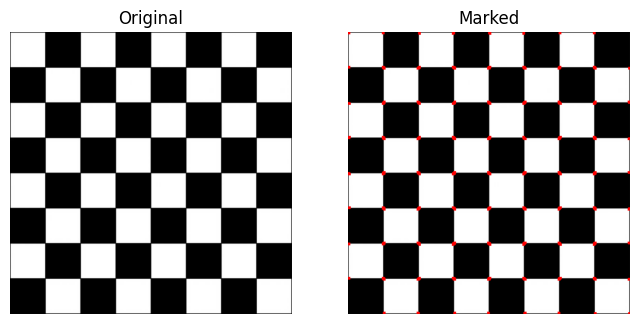

In [50]:
img = cv.imread("chessboard.jpg")
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
 
#result is dilated for marking the corners, not important
dst = cv.dilate(dst, None, iterations=2)
 
# Threshold for an optimal value, it may vary depending on the image.
res = img.copy()
res[dst>0.01*dst.max()]=[255, 0, 0]


plt.figure(figsize=(8, 8))

plt.subplot(121), plt.imshow(img), plt.title("Original"), plt.axis("off")
plt.subplot(122), plt.imshow(res), plt.title("Marked"), plt.axis("off")

### Task 2 
Face Detection using Viola-Jones algorithm a step-by-step implementation in Python.

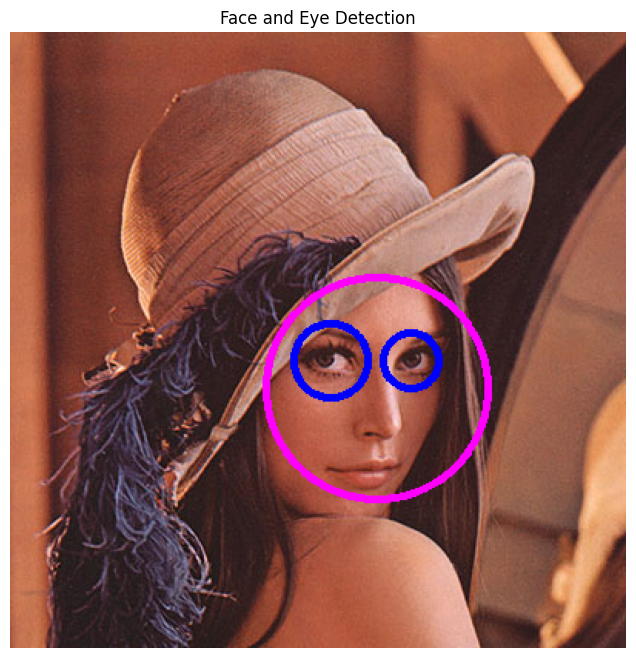

In [49]:
# Load pre-trained Haar cascades
face_cascade = cv.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eyes_cascade = cv.CascadeClassifier('haarcascades/haarcascade_eye.xml')

# Load the image
img = cv.imread('lena.png')  # Replace 'your_image.jpg' with your image path
frame_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
frame_gray = cv.equalizeHist(frame_gray)

# Detect faces
faces = face_cascade.detectMultiScale(frame_gray)
for (x, y, w, h) in faces:
    center = (x + w // 2, y + h // 2)
    img = cv.ellipse(img, center, (w // 2, h // 2), 0, 0, 360, (255, 0, 255), 4)
    
    # ROI for eyes
    faceROI = frame_gray[y:y + h, x:x + w]
    eyes = eyes_cascade.detectMultiScale(faceROI)
    
    for (ex, ey, ew, eh) in eyes:
        eye_center = (x + ex + ew // 2, y + ey + eh // 2)
        radius = int(round((ew + eh) * 0.25))
        img = cv.circle(img, eye_center, radius, (255, 0, 0), 4)

# Display the result
plt.figure(figsize=(8, 8))
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title("Face and Eye Detection")
plt.axis("off")
plt.show()


### Task 3
Implementation of SIFT (Scale-Invariant Feature Transform) algorithm for feature detection and description.

(<matplotlib.image.AxesImage at 0x71cef00aef30>,
 (np.float64(-0.5), np.float64(599.5), np.float64(599.5), np.float64(-0.5)))

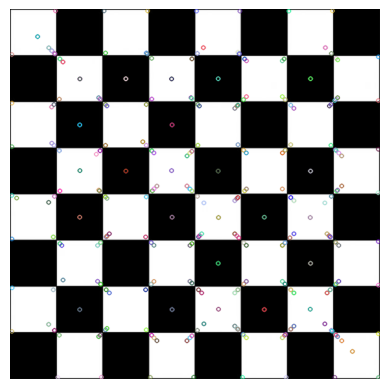

In [54]:
img = cv.imread('chessboard.jpg')
gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
sift = cv.SIFT_create()
kp = sift.detect(gray, None)
 
img=cv.drawKeypoints(gray, kp, img)
 
plt.imshow(img), plt.axis("off")

(<matplotlib.image.AxesImage at 0x71ced8bae1b0>,
 (np.float64(-0.5), np.float64(399.5), np.float64(399.5), np.float64(-0.5)))

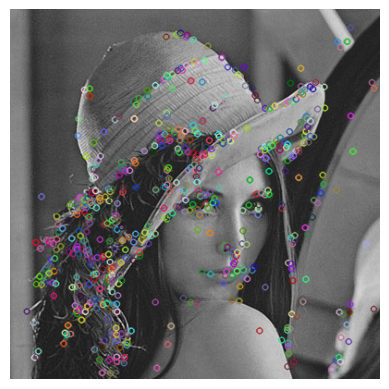

In [56]:
img = cv.imread('lena.png')
gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
 
sift = cv.SIFT_create()
kp = sift.detect(gray, None)
 
img=cv.drawKeypoints(gray, kp, img)
 
plt.imshow(img), plt.axis("off")